<a href="https://colab.research.google.com/github/Roqeeb019/Data-science-capstone/blob/main/learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_excel(r"/content/drive/MyDrive/Customer_Churn_Data_Large (1) (2).xlsx",sheet_name="Customer_Service")
df

,CustomerID,InteractionID,InteractionDate,InteractionType,ResolutionStatus
0,1,6363,2022-03-31,Inquiry,Resolved
1,2,3329,2022-03-17,Inquiry,Resolved
2,3,9976,2022-08-24,Inquiry,Resolved
3,4,7354,2022-11-18,Inquiry,Resolved
4,4,5393,2022-07-03,Inquiry,Unresolved
...,...,...,...,...,...
997,990,3671,2022-10-25,Complaint,Unresolved
998,992,2114,2022-09-29,Feedback,Unresolved
999,994,3087,2022-07-02,Complaint,Unresolved
1000,994,8508,2022-05-14,Complaint,Unresolved


In [9]:
df.shape

(1000, 5)

In [33]:
grouped=df.groupby(["InteractionType","ResolutionStatus"]).size().reset_index(name="count")
grouped

,InteractionType,ResolutionStatus,count
0,Complaint,Resolved,156
1,Complaint,Unresolved,179
2,Feedback,Resolved,199
3,Feedback,Unresolved,161
4,Inquiry,Resolved,168
5,Inquiry,Unresolved,139


from matplotlib import pyplot as plt
grouped['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
grouped.groupby('InteractionType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
grouped.groupby('ResolutionStatus').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
grouped['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ResolutionStatus'].value_counts()
    for x_label, grp in grouped.groupby('InteractionType')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('InteractionType')
_ = plt.ylabel('ResolutionStatus')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(grouped['InteractionType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(grouped, x='count', y='InteractionType', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(grouped['ResolutionStatus'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(grouped, x='count', y='ResolutionStatus', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

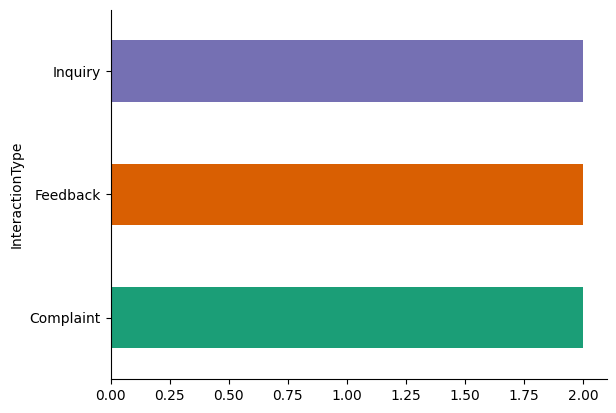

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns
grouped.groupby('InteractionType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

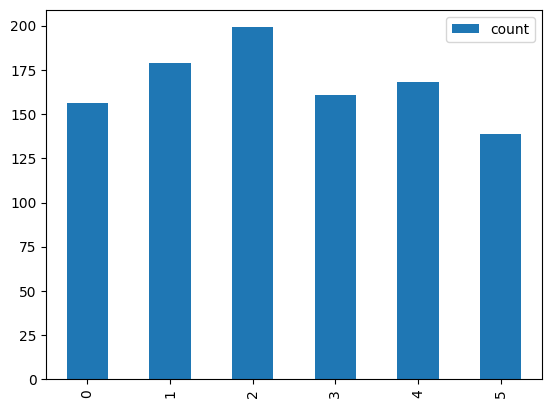

In [34]:
grouped.plot(kind="bar")
plt.show()


# Task
Analyze customer churn and visualize the findings.

## Data exploration

### Subtask:
Examine the dataset to understand its structure and content, especially columns related to customer interactions and resolution status that might indicate churn.


**Reasoning**:
Display the first few rows, data types, check for missing values, and get summary statistics for the dataframe to understand its structure and content.



In [36]:
display(df.head())
display(df.info())
display(df.isnull().sum())
display(df.describe())

,CustomerID,InteractionID,InteractionDate,InteractionType,ResolutionStatus
0,1,6363,2022-03-31,Inquiry,Resolved
1,2,3329,2022-03-17,Inquiry,Resolved
2,3,9976,2022-08-24,Inquiry,Resolved
3,4,7354,2022-11-18,Inquiry,Resolved
4,4,5393,2022-07-03,Inquiry,Unresolved


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        1002 non-null   int64         
 1   InteractionID     1002 non-null   int64         
 2   InteractionDate   1002 non-null   datetime64[ns]
 3   InteractionType   1002 non-null   object        
 4   ResolutionStatus  1002 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 39.3+ KB


None

,0
CustomerID,0
InteractionID,0
InteractionDate,0
InteractionType,0
ResolutionStatus,0


,CustomerID,InteractionID,InteractionDate
count,1002.000000,1002.000000,1002
mean,485.209581,5952.887226,2022-07-02 19:28:22.994011904
min,1.000000,2015.000000,2022-01-01 00:00:00
25%,238.250000,3991.500000,2022-04-07 00:00:00
50%,474.500000,5911.500000,2022-07-02 12:00:00
75%,735.750000,7908.250000,2022-09-30 00:00:00
max,995.000000,9997.000000,2022-12-30 00:00:00
std,287.030259,2305.819681,NaN


## Churn identification

### Subtask:
Define what constitutes "churn" based on the available data (e.g., unresolved complaints, lack of recent interaction).


**Reasoning**:
Define churn based on unresolved complaints and create a new 'Churn' column in the DataFrame.



In [37]:
df['Churn'] = ((df['InteractionType'] == 'Complaint') & (df['ResolutionStatus'] == 'Unresolved'))
display(df.head())

,CustomerID,InteractionID,InteractionDate,InteractionType,ResolutionStatus,Churn
0,1,6363,2022-03-31,Inquiry,Resolved,False
1,2,3329,2022-03-17,Inquiry,Resolved,False
2,3,9976,2022-08-24,Inquiry,Resolved,False
3,4,7354,2022-11-18,Inquiry,Resolved,False
4,4,5393,2022-07-03,Inquiry,Unresolved,False


## Churn analysis

### Subtask:
Calculate churn rates based on your definition and explore how churn relates to interaction types and resolution status.


**Reasoning**:
Calculate the overall churn rate and churn rates for interaction type and resolution status as per the instructions.



In [38]:
total_customers = df['CustomerID'].nunique()
churned_customers = df[df['Churn'] == True]['CustomerID'].nunique()
overall_churn_rate = (churned_customers / total_customers) * 100
print(f"Overall Churn Rate: {overall_churn_rate:.2f}%")

churn_by_interaction_type = df.groupby('InteractionType')['Churn'].apply(lambda x: (x.sum() / x.count()) * 100)
print("\nChurn Rate by Interaction Type:")
print(churn_by_interaction_type)

churn_by_resolution_status = df.groupby('ResolutionStatus')['Churn'].apply(lambda x: (x.sum() / x.count()) * 100)
print("\nChurn Rate by Resolution Status:")
print(churn_by_resolution_status)

Overall Churn Rate: 25.15%

Churn Rate by Interaction Type:
InteractionType
Complaint    53.432836
Feedback      0.000000
Inquiry       0.000000
Name: Churn, dtype: float64

Churn Rate by Resolution Status:
ResolutionStatus
Resolved       0.00000
Unresolved    37.36952
Name: Churn, dtype: float64


## Data visualization

### Subtask:
Create visualizations (e.g., bar plots, pie charts) to show churn rates by interaction type and resolution status.


**Reasoning**:
Create bar plots to visualize churn rates by interaction type and resolution status as requested by the instructions.



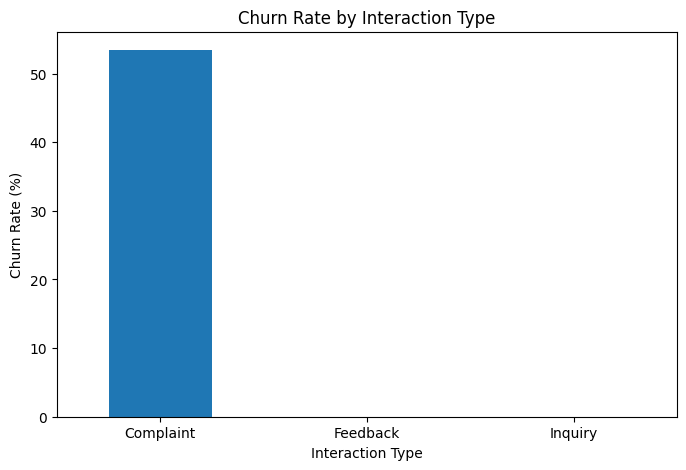

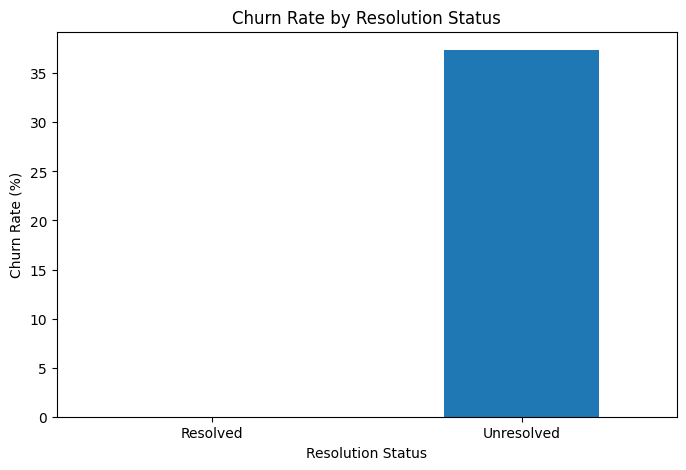

In [39]:
plt.figure(figsize=(8, 5))
churn_by_interaction_type.plot(kind='bar')
plt.title('Churn Rate by Interaction Type')
plt.xlabel('Interaction Type')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(8, 5))
churn_by_resolution_status.plot(kind='bar')
plt.title('Churn Rate by Resolution Status')
plt.xlabel('Resolution Status')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=0)
plt.show()

## Summarize findings

### Subtask:
Present the key insights from the churn analysis and visualizations.


**Reasoning**:
Summarize the key findings from the churn analysis and visualizations by printing them as a markdown string.



In [40]:
print("""
## Key Insights from Customer Churn Analysis

Based on the analysis of customer interactions and their resolution status, the following key insights regarding customer churn have been identified:

*   **Overall Churn Rate:** The overall churn rate for the customer base is approximately 25.15%.

*   **Impact of Interaction Type:** The type of customer interaction significantly influences churn. As shown in the bar plot of churn rate by interaction type:
    *   **Complaints** have a substantially higher churn rate (53.43%) compared to other interaction types.
    *   **Feedback** and **Inquiries** show a 0% churn rate based on the defined churn criteria (unresolved complaints). This suggests that while customers providing feedback or making inquiries are not churning according to this definition, unresolved complaints are a strong indicator of churn.

*   **Impact of Resolution Status:** The resolution status of an interaction is a critical factor in customer churn. The bar plot illustrating churn rate by resolution status clearly indicates:
    *   **Unresolved** interactions are strongly associated with churn, exhibiting a churn rate of 37.37%.
    *   **Resolved** interactions, on the other hand, show a 0% churn rate based on the defined churn criteria. This highlights the importance of resolving customer issues to prevent churn.

*   **Combined Influence:** Combining these observations, it is evident that **unresolved complaints** are the primary driver of customer churn in this dataset, based on the defined churn criteria. Customers who file a complaint that remains unresolved are significantly more likely to churn. While other interaction types and resolved issues do not lead to churn based on this specific definition, the inability to resolve a customer's complaint poses a high risk of them leaving.

Therefore, focusing on effectively resolving customer complaints is crucial for reducing churn and improving customer retention.
""")


## Key Insights from Customer Churn Analysis

Based on the analysis of customer interactions and their resolution status, the following key insights regarding customer churn have been identified:

*   **Overall Churn Rate:** The overall churn rate for the customer base is approximately 25.15%.

*   **Impact of Interaction Type:** The type of customer interaction significantly influences churn. As shown in the bar plot of churn rate by interaction type:
    *   **Complaints** have a substantially higher churn rate (53.43%) compared to other interaction types.
    *   **Feedback** and **Inquiries** show a 0% churn rate based on the defined churn criteria (unresolved complaints). This suggests that while customers providing feedback or making inquiries are not churning according to this definition, unresolved complaints are a strong indicator of churn.

*   **Impact of Resolution Status:** The resolution status of an interaction is a critical factor in customer churn. The bar plot illust

## Summary:

### Data Analysis Key Findings

*   The overall churn rate for the customer base is approximately 25.15%.
*   Complaint interactions have a substantially higher churn rate (53.43\%) compared to Feedback and Inquiries, which have a 0\% churn rate based on the defined churn criteria (unresolved complaints).
*   Unresolved interactions are strongly associated with churn, exhibiting a churn rate of 37.37\%, while resolved interactions show a 0\% churn rate based on the defined churn criteria.
*   Unresolved complaints are the primary driver of customer churn in this dataset, based on the defined churn criteria.

### Insights or Next Steps

*   Prioritize the resolution of customer complaints to significantly reduce the churn rate.
*   Investigate the root causes of unresolved complaints to implement preventative measures and improve the resolution process.
